In [34]:
import pandas as pd

In [35]:
doviz_analiz = pd.read_csv("gau_usd.csv")
doviz_analiz["gau"] = doviz_analiz["gau"] * 0.01

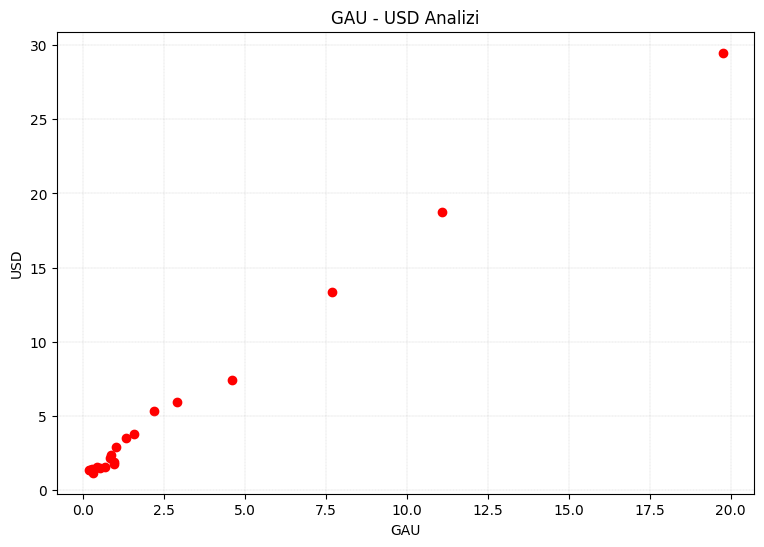

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.scatter(doviz_analiz["gau"], doviz_analiz["usd"], color="red")
plt.xlabel("GAU")
plt.ylabel("USD")
plt.title("GAU - USD Analizi")
plt.grid(True, which="both", ls="--", linewidth=0.2)
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
model.fit(doviz_analiz[["gau"]], doviz_analiz["usd"])

LinearRegression()

In [54]:
model.coef_, model.intercept_

(array([1.4901213]), np.float64(1.0593853141623297))

In [55]:
tahmin = model.predict([[20]])
tahmin

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.86181135])

In [56]:
tahminler = model.predict(doviz_analiz[["gau"]])

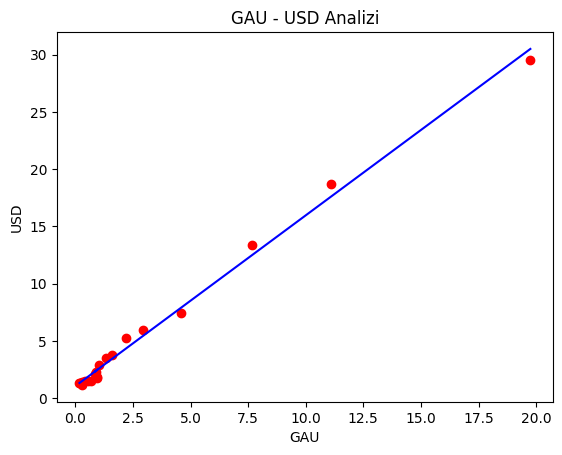

In [57]:
plt.scatter(doviz_analiz["gau"], doviz_analiz["usd"], color="red")
plt.plot(doviz_analiz["gau"], tahminler, color="blue")
plt.xlabel("GAU")
plt.ylabel("USD")
plt.title("GAU - USD Analizi")
plt.show()

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(doviz_analiz[["gau", "usd"]])
doviz_analiz["Küme"] = kmeans.labels_
doviz_analiz


,year,gau,usd,Küme
0,2005,0.18,1.34,0
1,2006,0.22,1.34,0
2,2007,0.29,1.41,0
3,2008,0.31,1.16,0
4,2009,0.43,1.52,0
5,2010,0.53,1.49,0
6,2011,0.69,1.54,0
7,2012,0.96,1.89,0
8,2013,0.96,1.73,0
9,2014,0.85,2.13,0


In [59]:
kmeans.cluster_centers_

array([[ 1.17352941,  2.75058824],
       [19.75      , 29.49      ],
       [ 9.39      , 16.04      ]])

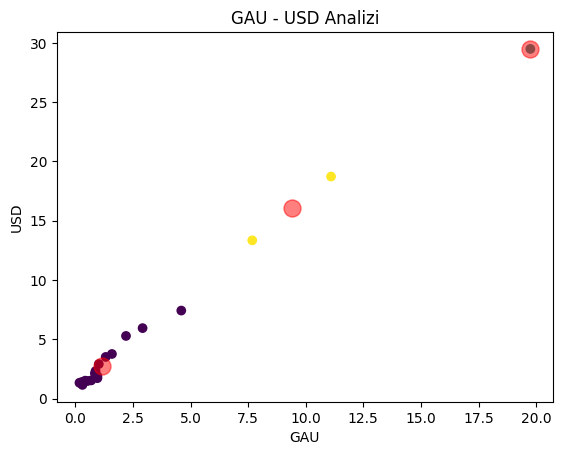

In [62]:
import matplotlib.pyplot as plt

plt.scatter(doviz_analiz["gau"], doviz_analiz["usd"], c=doviz_analiz["Küme"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", s=150, alpha=0.5)
plt.xlabel("GAU")
plt.ylabel("USD")
plt.title("GAU - USD Analizi")
plt.show()